In [1]:
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b'
resource_group = 'VChamp-Team3'
workspace_name = 'vchamp-team3'


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.

workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_quality_check']
datastore = workspace.datastores['data_team3_synthetic_train']

In [3]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'demographics_static_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
demographic_static = dataset.to_pandas_dataframe()

In [5]:
type(demographic_static)

pandas.core.frame.DataFrame

### **DEMOGRAPHIC STATIC**

Listing all the features of "Demographic Static" files.

**Internalpatientid** - Unique internal id for the patient.

**Ethnicity** - The quality or fact of belonging to a population group or subgroup made up of people who share a common cultural background or descent.('Not specified', 'Not Hispanic or Latino', 'Hispanic or Latino')

**Gender** - Male or Female.

**Races **- a group of people of common ancestry, distinguished from others by physical characteristics, such as hair type, colour of eyes and skin, stature, etc. ('Other', 'White', 'Black or African American', 'Not specified (no value)', 'Asian', 'White ; Other', 'Black or African American ; White', 'Black or African American ; Other')

 **Veteran flag** - a person who has served in the army, navy or air force, especially during a war(Yes or NO)

In [6]:
demographic_static.head()

,Column1,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,0,168674,Hispanic or Latino,Male,White,True
1,1,168681,Not Hispanic or Latino,Male,White,True
2,2,168696,Not Hispanic or Latino,Female,Not specified (no value),True
3,3,168711,Not Hispanic or Latino,Male,Other,True
4,4,168720,Not Hispanic or Latino,Male,White,True


In [7]:
# shape of the dataframe
demographic_static.shape

(133252, 6)

**Dropping the "column1" column which is unnecessary for the analysis.**

In [8]:
demographic_static = demographic_static.drop('Column1', axis = 1)
demographic_static.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,True
1,168681,Not Hispanic or Latino,Male,White,True
2,168696,Not Hispanic or Latino,Female,Not specified (no value),True
3,168711,Not Hispanic or Latino,Male,Other,True
4,168720,Not Hispanic or Latino,Male,White,True


In [9]:
# checking the info
demographic_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133252 entries, 0 to 133251
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Internalpatientid  133252 non-null  int64 
 1   Ethnicity          133252 non-null  object
 2   Gender             133252 non-null  object
 3   Races              133252 non-null  object
 4   Veteran flag       133252 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 4.2+ MB


In [10]:
#Checking the null values
demographic_static.isnull().sum()

Internalpatientid    0
Ethnicity            0
Gender               0
Races                0
Veteran flag         0
dtype: int64

**There are no null values in the dataframe.**

In [11]:
# checking unique values for each column
demographic_static.nunique()

Internalpatientid    133252
Ethnicity                 3
Gender                    2
Races                    15
Veteran flag              2
dtype: int64

In [12]:
#value counts for the "Ethnicity" column
demographic_static['Ethnicity'].value_counts()

Not Hispanic or Latino    102367
Not specified              26486
Hispanic or Latino          4399
Name: Ethnicity, dtype: int64

**Mostly people are from "Not Hispanic or Latino" category around 102367**

**26486 prople are from "Not specified category.**

**category "Hispanic or Latino have least number of patients arounf 4399**

In [13]:
demographic_static['Ethnicity'].value_counts(normalize = True)

Not Hispanic or Latino    0.768221
Not specified             0.198766
Hispanic or Latino        0.033013
Name: Ethnicity, dtype: float64

**"Not hispanic or Latino" are of 76%,"Not specified" are 19%, "Hispanic or Latino" are 4%**

In [14]:
# value counts for the "gender" column
demographic_static['Gender'].value_counts()

Male      129777
Female      3475
Name: Gender, dtype: int64

**Male are 129777 and females are 3475**

In [15]:
demographic_static['Gender'].value_counts(normalize = True)

Male      0.973922
Female    0.026078
Name: Gender, dtype: float64

** Males are 97% and females are only around 3 %**

In [16]:
# value counts for the "Races" column
demographic_static['Races'].value_counts()

White                                        85159
Not specified (no value)                     22501
Black or African American                    16699
Other                                         6513
White ; Other                                 1431
Asian                                          431
Black or African American ; Other              267
Black or African American ; White              198
Asian ; Other                                   17
White ; Asian                                   16
Black or African American ; White ; Other       11
White ; Asian ; Other                            5
Black or African American ; Asian                2
(Censored)                                       1
Black or African American ; White ; Asian        1
Name: Races, dtype: int64

In [17]:
demographic_static['Races'].value_counts(normalize= True)

White                                        0.639082
Not specified (no value)                     0.168861
Black or African American                    0.125319
Other                                        0.048877
White ; Other                                0.010739
Asian                                        0.003234
Black or African American ; Other            0.002004
Black or African American ; White            0.001486
Asian ; Other                                0.000128
White ; Asian                                0.000120
Black or African American ; White ; Other    0.000083
White ; Asian ; Other                        0.000038
Black or African American ; Asian            0.000015
(Censored)                                   0.000008
Black or African American ; White ; Asian    0.000008
Name: Races, dtype: float64

**Mostly people are White with 63%  and least are Black or African, white,asian**

In [18]:
# value counts for the "Veteran flag" column
demographic_static['Veteran flag'].value_counts()

True     133093
False       159
Name: Veteran flag, dtype: int64

In [19]:
demographic_static['Veteran flag'].value_counts(normalize = True)

True     0.998807
False    0.001193
Name: Veteran flag, dtype: float64

**99% of the people are from veteran category**

### **Univariate Analysis**

### **1. Ethnicity**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

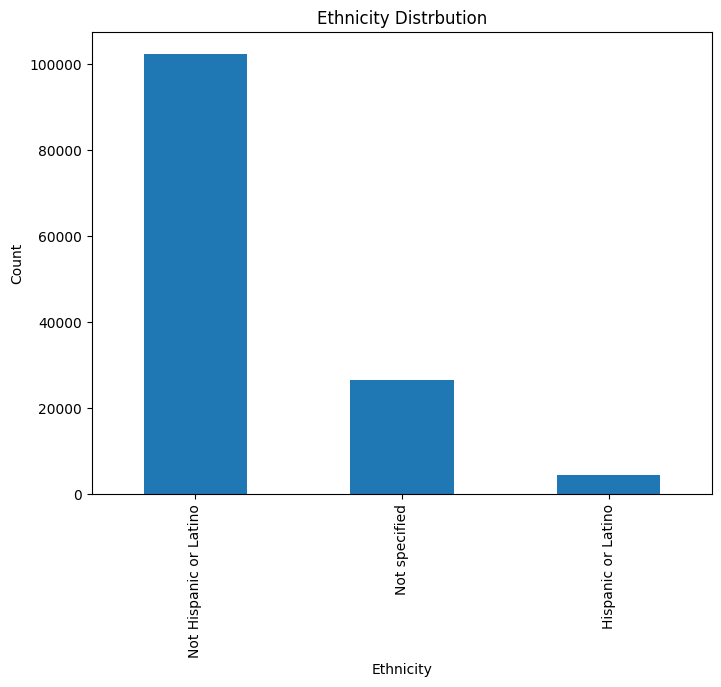

In [21]:
# Analyze the ethinicity distribution

ethinicity_distribution = demographic_static['Ethnicity'].value_counts()

# Map the values to meaningful categories

ethinicity_distribution = ethinicity_distribution.replace({
    1:'Not Hispanic or Latino',
    2: 'Not specified',
    3: 'Hispanic or Latino'
})

# Plot the ethinicty distrbution

plt.figure(figsize=(8,6))
ethinicity_distribution.plot(kind = 'bar')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Distrbution')
plt.show()

### **2. Gender**

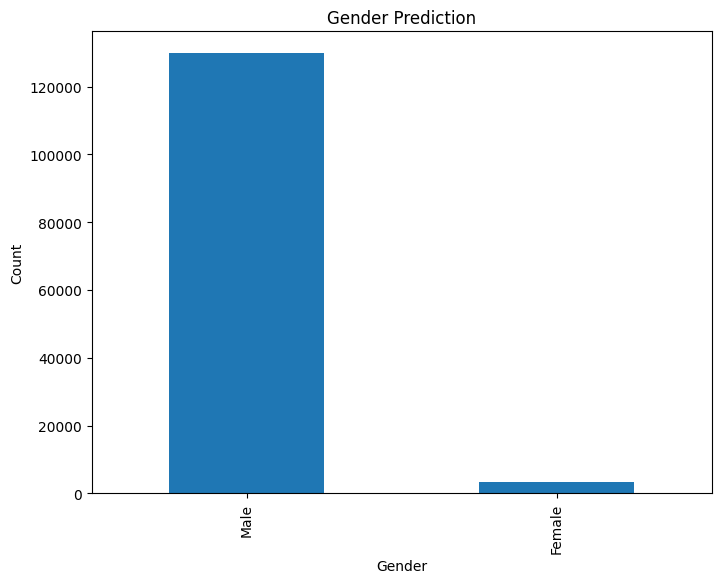

In [22]:
# Analyze the gender distrbution

gender_distribution = demographic_static['Gender'].value_counts()

#plot the gender distribution

plt.figure(figsize=(8,6))
gender_distribution.plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Prediction')
plt.show()

### **3.Veteran Flag**

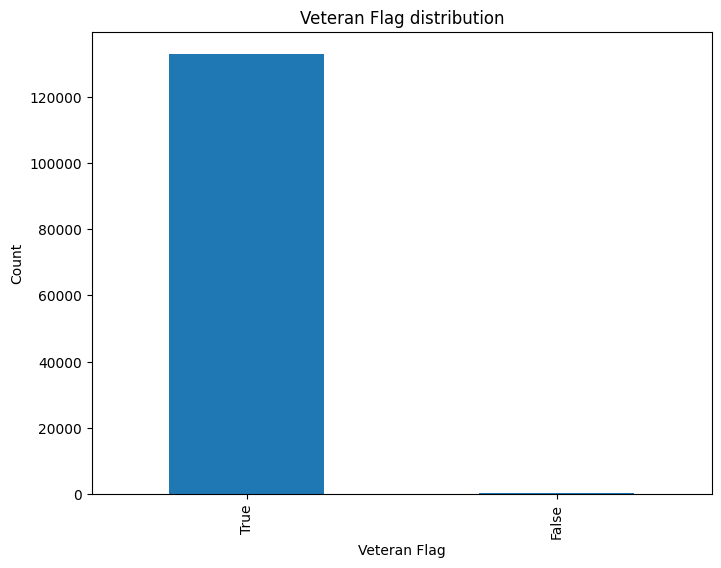

In [23]:
#Analyze the veteran flag distribution

veteran_flag_distribution = demographic_static['Veteran flag'].value_counts()

# Plot the veteran flag distribution

plt.figure(figsize = (8,6))
veteran_flag_distribution.plot(kind = 'bar')
plt.xlabel('Veteran Flag')
plt.ylabel('Count')
plt.title('Veteran Flag distribution')
plt.show()

### **4.Races**

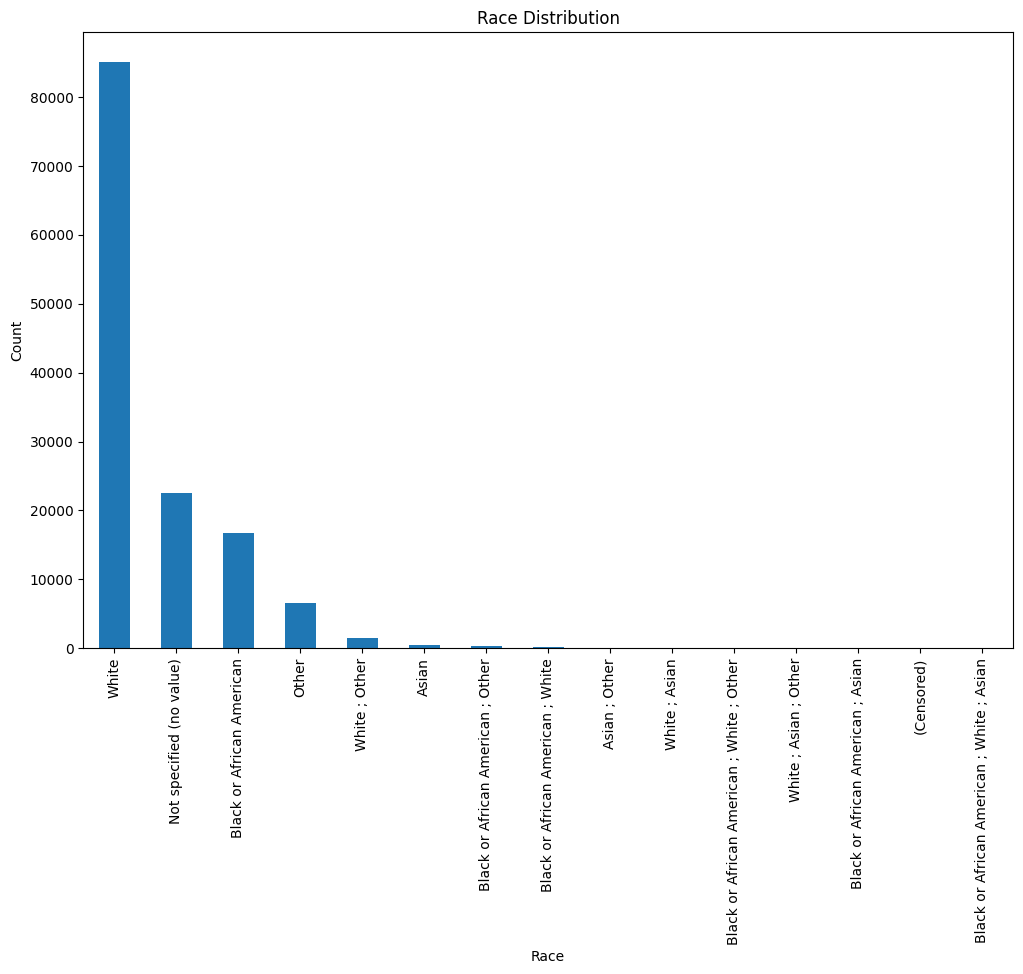

In [24]:
# Analyze the races distribtion

races_distribution = demographic_static['Races'].value_counts()

#Plot the races distrbution

plt.figure(figsize=(12,8))
races_distribution.plot(kind = 'bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()

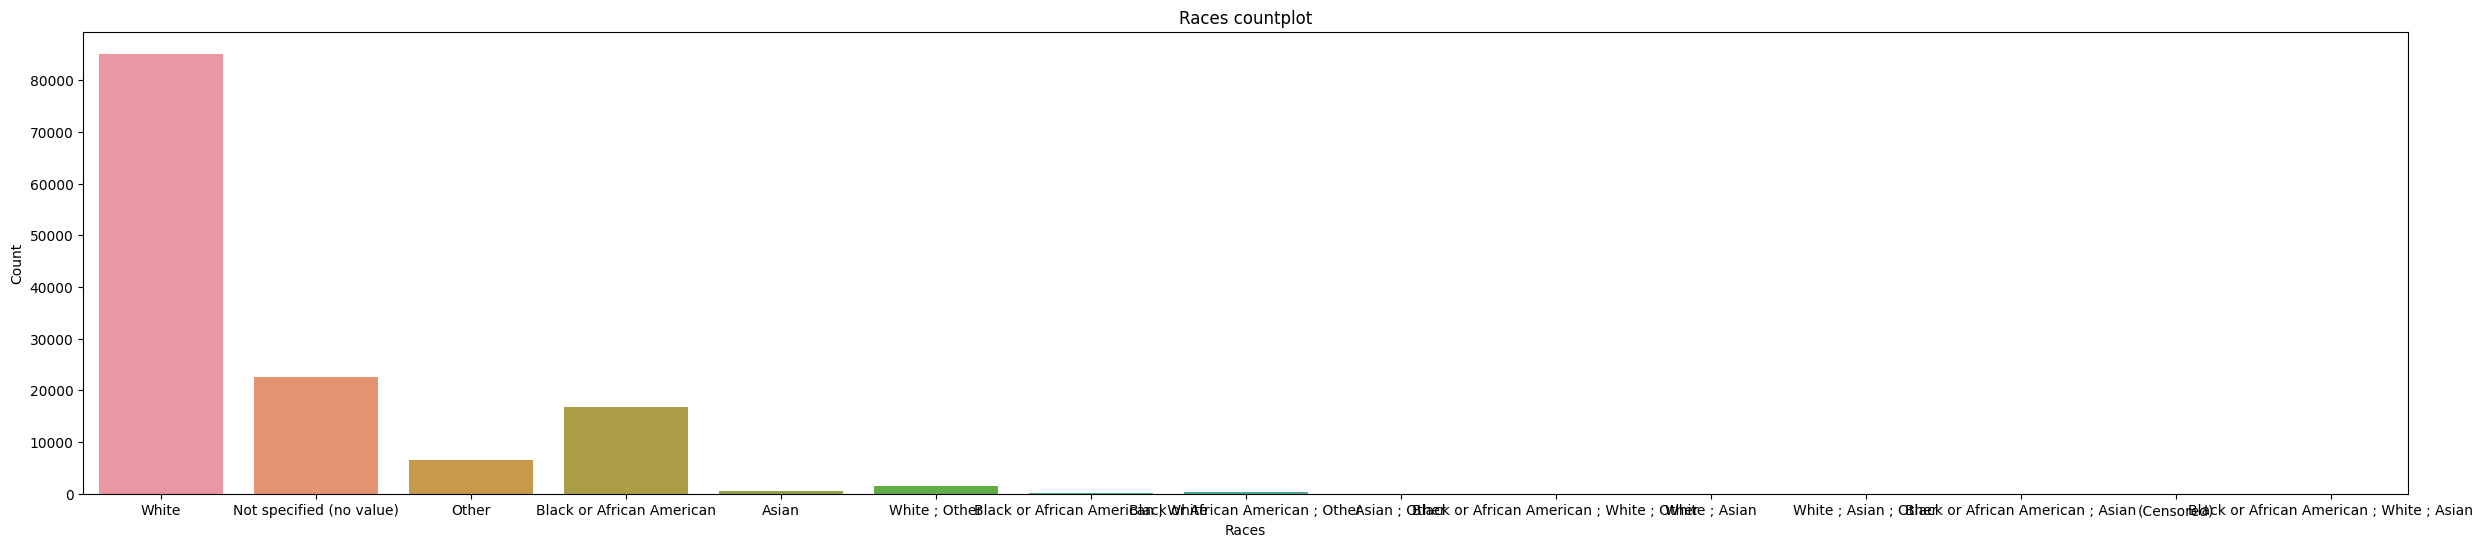

In [25]:
# Create the countplot
plt.figure(figsize=(30,6))
sns.countplot(x="Races", data=demographic_static)

# Add labels and title
plt.xlabel("Races")
plt.ylabel("Count")
plt.title("Races countplot")

# Show the plot
plt.show()

### **Using the death file do to the Bivariate Analysis with the Demographic static train file**

In [26]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [27]:
death_file = dataset.to_pandas_dataframe()

In [28]:
type(death_file)

pandas.core.frame.DataFrame

In [29]:

death_file.head()

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06


In [30]:
death_file = death_file.drop('Column1', axis = 1)
death_file.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10
1,100037,75.241135,2008-10-16 15:14:26
2,100045,85.399403,2019-01-26 11:33:52
3,100095,84.136551,2004-08-10 21:49:35
4,10013,68.372126,2007-06-11 00:17:06


In [31]:
#Shape of death file datafram
death_file.shape
     

(97284, 3)

In [32]:
death_file['death'] = 1
death_file.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10,1
1,100037,75.241135,2008-10-16 15:14:26,1
2,100045,85.399403,2019-01-26 11:33:52,1
3,100095,84.136551,2004-08-10 21:49:35,1
4,10013,68.372126,2007-06-11 00:17:06,1


In [33]:
merge_demographic_static_death= pd.merge(demographic_static, death_file, how='left',on='Internalpatientid')

In [34]:

merge_demographic_static_death.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,Age at death,Death date,death
0,168674,Hispanic or Latino,Male,White,True,91.750072,2016-07-14 15:37:51,1.0
1,168681,Not Hispanic or Latino,Male,White,True,77.813946,2022-05-26 23:56:11,1.0
2,168696,Not Hispanic or Latino,Female,Not specified (no value),True,52.394255,2012-04-09 02:24:20,1.0
3,168711,Not Hispanic or Latino,Male,Other,True,NaN,NaT,NaN
4,168720,Not Hispanic or Latino,Male,White,True,NaN,NaT,NaN


In [35]:
merge_demographic_static_death['death'] = merge_demographic_static_death['death'].fillna(0.0)

merge_demographic_static_death.head()


,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,Age at death,Death date,death
0,168674,Hispanic or Latino,Male,White,True,91.750072,2016-07-14 15:37:51,1.0
1,168681,Not Hispanic or Latino,Male,White,True,77.813946,2022-05-26 23:56:11,1.0
2,168696,Not Hispanic or Latino,Female,Not specified (no value),True,52.394255,2012-04-09 02:24:20,1.0
3,168711,Not Hispanic or Latino,Male,Other,True,NaN,NaT,0.0
4,168720,Not Hispanic or Latino,Male,White,True,NaN,NaT,0.0


**The Final Dataframe will look like this-**

In [36]:
merge_demographic_static_death.drop(['Age at death','Death date'],axis = 1, inplace = True)
merge_demographic_static_death.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,death
0,168674,Hispanic or Latino,Male,White,True,1.0
1,168681,Not Hispanic or Latino,Male,White,True,1.0
2,168696,Not Hispanic or Latino,Female,Not specified (no value),True,1.0
3,168711,Not Hispanic or Latino,Male,Other,True,0.0
4,168720,Not Hispanic or Latino,Male,White,True,0.0


# **Bivairate Analysis**

##### 1.Ethnicity & Death

In [37]:
ethnicity_death_crosstab = pd.crosstab(merge_demographic_static_death['Ethnicity'],merge_demographic_static_death['death'])
print(ethnicity_death_crosstab)

death                     0.0    1.0
Ethnicity                           
Hispanic or Latino       1609   2790
Not Hispanic or Latino  31567  70800
Not specified            2792  23694


**In "Hispanic or Latino" category 2790 are dead and 1609 are alive**

**In "Not Hispanic or Latino" category 70800 are dead and 31567 are alive**

**In "Not specified" category 23694 are dead and 2792 are alive.**

In [40]:

#calculate the percentage within each Ethnicity category

ethnicity_death_proportions = ethnicity_death_crosstab.div(ethnicity_death_crosstab.sum(axis = 1), axis = 0)*100

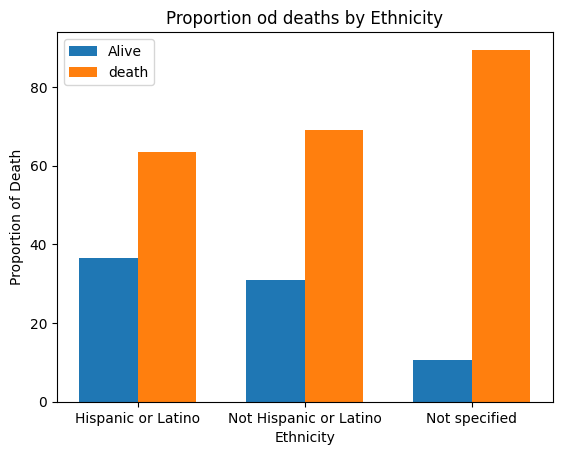

In [41]:

width = 0.35
x = range(len(ethnicity_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,ethnicity_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], ethnicity_death_proportions[1], width, label = "death")

ax.set_xlabel('Ethnicity')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Ethnicity')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(ethnicity_death_proportions.index)
ax.legend()

plt.show()
     

##### **2. Gender and Death**

In [42]:
Gender_death_crosstab = pd.crosstab(merge_demographic_static_death['Gender'],merge_demographic_static_death['death'])
print(Gender_death_crosstab)

death     0.0    1.0
Gender              
Female   1577   1898
Male    34391  95386


**In Female category 1898 are dead and 1577 are alive.**

**In Male category 95386 are dead and 34391 are alive**

In [43]:
#calculate the percentage within each Gender category

Gender_death_proportions = Gender_death_crosstab.div(Gender_death_crosstab.sum(axis = 1), axis = 0)*100
    
     

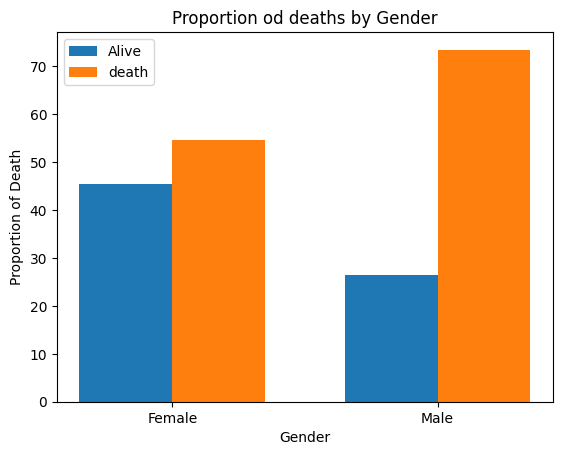

In [44]:
width = 0.35
x = range(len(Gender_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Gender_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Gender_death_proportions[1], width, label = "death")

ax.set_xlabel('Gender')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Gender')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Gender_death_proportions.index)
ax.legend()

plt.show()

##### **3. Races & Death**

In [45]:
Races_death_crosstab = pd.crosstab(merge_demographic_static_death['Races'],merge_demographic_static_death['death'])
print(Races_death_crosstab)
     

death                                        0.0    1.0
Races                                                  
(Censored)                                     1      0
Asian                                        180    251
Asian ; Other                                  4     13
Black or African American                   6777   9922
Black or African American ; Asian              1      1
Black or African American ; Other            104    163
Black or African American ; White             67    131
Black or African American ; White ; Asian      1      0
Black or African American ; White ; Other      5      6
Not specified (no value)                     826  21675
Other                                       1992   4521
White                                      25582  59577
White ; Asian                                  8      8
White ; Asian ; Other                          1      4
White ; Other                                419   1012


**As we know in Races we have high majority of patients from the "white" category in this 59577 are dead and 25582 are alive.**

In [46]:
#calculate the percentage within each Gender category

Races_death_proportions = Races_death_crosstab.div(Races_death_crosstab.sum(axis = 1), axis = 0)*100
     

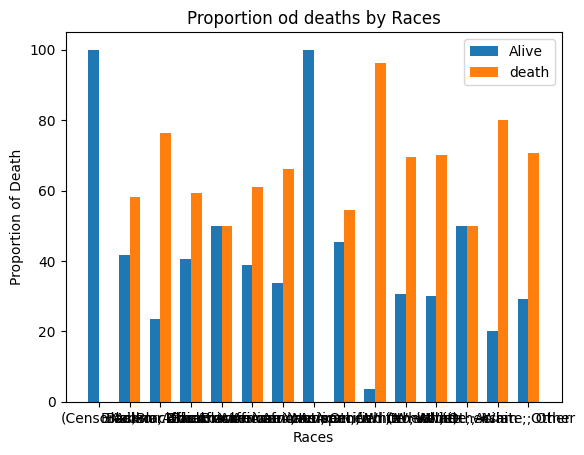

In [47]:

width = 0.35
x = range(len(Races_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Races_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Races_death_proportions[1], width, label = "death")

ax.set_xlabel('Races')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Races')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Races_death_proportions.index)
ax.legend()

plt.show()

##### **4. Veteranflag & Death**

In [48]:
Veteranflag_death_crosstab = pd.crosstab(merge_demographic_static_death['Veteran flag'],merge_demographic_static_death['death'])
print(Veteranflag_death_crosstab)

death           0.0    1.0
Veteran flag              
False            56    103
True          35912  97181


**patients who are veteran - 97181 are dead and 35912 are alive.**


In [49]:
#calculate the percentage within each veteranflag category

Veteranflag_death_proportions = Veteranflag_death_crosstab.div(Veteranflag_death_crosstab.sum(axis = 1), axis = 0)*100

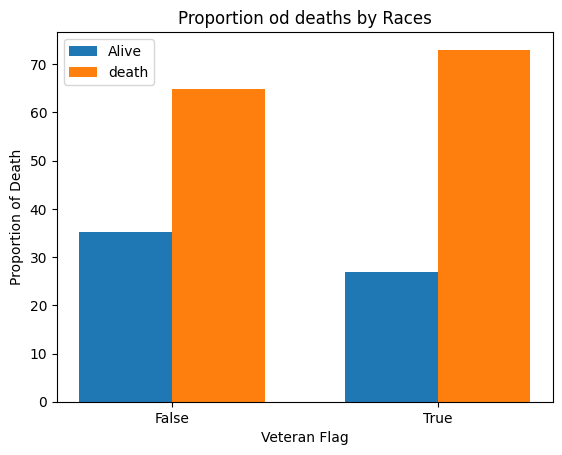

In [50]:
width = 0.35
x = range(len(Veteranflag_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Veteranflag_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Veteranflag_death_proportions[1], width, label = "death")

ax.set_xlabel('Veteran Flag')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Races')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Veteranflag_death_proportions.index)
ax.legend()

plt.show()

###### **Visualising the dead and alive patients from the dataframe**

In [51]:
merge_demographic_static_death['death'].value_counts()

1.0    97284
0.0    35968
Name: death, dtype: int64

In [52]:
merge_demographic_static_death['death'].value_counts(normalize = True)

1.0    0.730075
0.0    0.269925
Name: death, dtype: float64

**73% of the patients are dead and 26% are alive.**

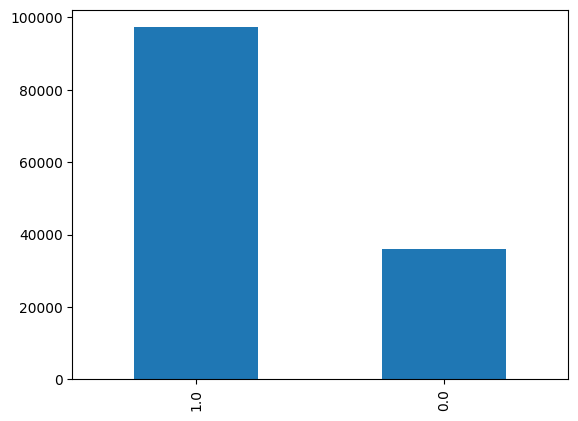

In [53]:
merge_demographic_static_death['death'].value_counts().plot(kind='bar')

#### **Checking the dataframes for the alive and death patients for the given merged files.**

In [54]:
df_alive = merge_demographic_static_death[merge_demographic_static_death["death"]==0]
df_alive

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,death
3,168711,Not Hispanic or Latino,Male,Other,True,0.0
4,168720,Not Hispanic or Latino,Male,White,True,0.0
5,168734,Not Hispanic or Latino,Male,White,True,0.0
13,168972,Not Hispanic or Latino,Male,Black or African American,True,0.0
14,168973,Not Hispanic or Latino,Male,Other,True,0.0
...,...,...,...,...,...,...
133236,16853,Not Hispanic or Latino,Male,White,True,0.0
133238,168538,Not Hispanic or Latino,Male,White,True,0.0
133248,168626,Not Hispanic or Latino,Male,Black or African American,True,0.0
133249,168628,Not Hispanic or Latino,Male,White,True,0.0


### **35968 patients are alive**

In [55]:
df_death =  merge_demographic_static_death[merge_demographic_static_death["death"]==1]
df_death

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,death
0,168674,Hispanic or Latino,Male,White,True,1.0
1,168681,Not Hispanic or Latino,Male,White,True,1.0
2,168696,Not Hispanic or Latino,Female,Not specified (no value),True,1.0
6,168756,Not specified,Male,Not specified (no value),True,1.0
7,168794,Not Hispanic or Latino,Male,White,True,1.0
...,...,...,...,...,...,...
133244,168597,Not Hispanic or Latino,Male,White,True,1.0
133245,168616,Not specified,Male,Not specified (no value),True,1.0
133246,168622,Not Hispanic or Latino,Male,Not specified (no value),True,1.0
133247,168624,Not Hispanic or Latino,Male,Black or African American,True,1.0


#### **97284 patients are dead.**